### predicting the China GDP using logistic regression from scracth in python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Independent Variable')

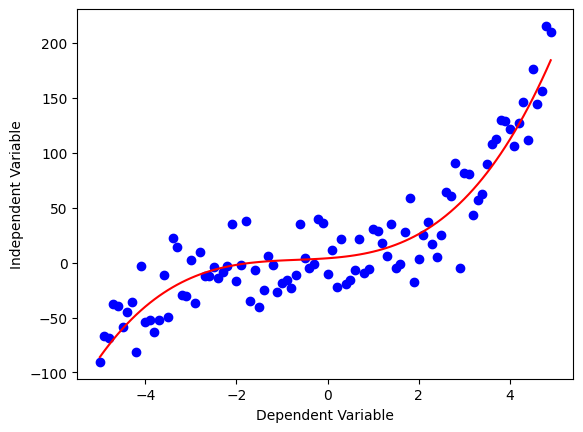

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
x
y = 1 * (x ** 3) + 2 * (x ** 2) + 3 * x + 4
y_noise = 20 * np.random.normal(size=x.size) 
# y_noise = np.random.normal(size=x.size) 
# print(y_noise)
y_data = y_noise + y
plt.plot(x, y_data, 'bo')
plt.plot(x, y, 'r')
plt.xlabel("Dependent Variable")
plt.ylabel("Independent Variable")

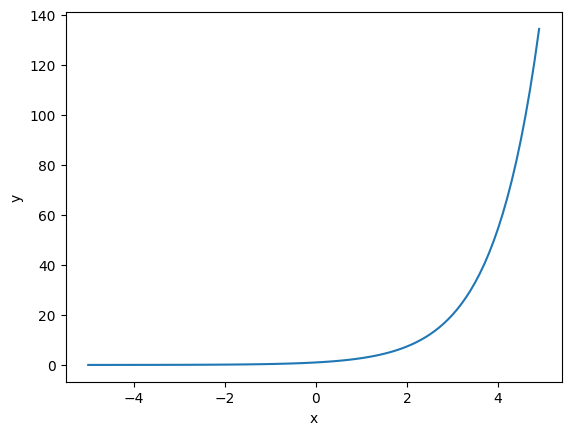

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x)
# print(y)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Sigmoidal/Logistic

$$ Y = a + \frac{b}{1 + c^{(X-d)}}

In [ ]:
# Sigmoind plot
